In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/ab_data.csv')
df.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')

In [6]:
daily_data = df.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id':'user_count'})
daily_data.head()

,timestamp,group,user_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [7]:
daily_data['conversion'] = round(daily_data['converted']/daily_data['user_count']*100,2)
daily_data[daily_data['timestamp']=='2017-01-05']

,timestamp,group,user_count,converted,conversion
6,2017-01-05,A,6419,791,12.32
7,2017-01-05,B,6509,743,11.41


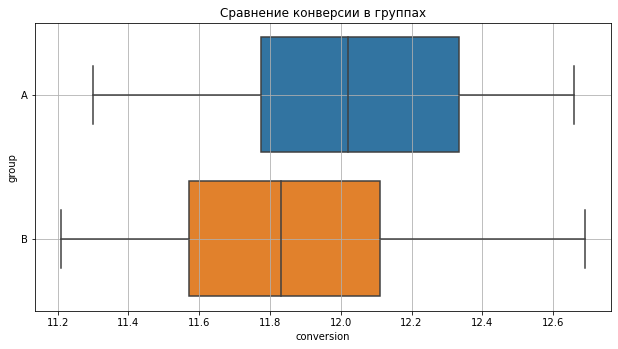

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax)
ax.set_title('Сравнение конверсии в группах')
ax.grid(True)

In [9]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(['mean', 'median'])
conversion_piv

,mean,median
group,,
A,12.033478,12.02
B,11.872174,11.83


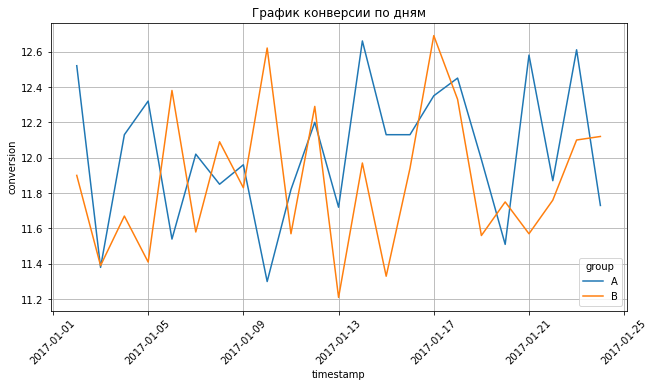

In [10]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group',
    ax=ax
)
ax.set_title('График конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)

In [11]:
daily_data_a = daily_data[daily_data['group']=='A']
daily_data_a.loc[:,'cum_users_count'] = daily_data_a['user_count'].cumsum()
daily_data_a[['timestamp','user_count','cum_users_count']].head()

C:\Users\Denis\AppData\Local\Temp\ipykernel_19908\3890550851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:,'cum_users_count'] = daily_data_a['user_count'].cumsum()


,timestamp,user_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [12]:
daily_data['cum_users_count'] = daily_data.groupby(['group'])['user_count'].cumsum()
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count']*100
daily_data.head()

,timestamp,group,user_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.52,2851,357,12.521922
1,2017-01-02,B,2848,339,11.90,2848,339,11.903090
2,2017-01-03,A,6584,749,11.38,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.39,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.13,16008,1903,11.887806


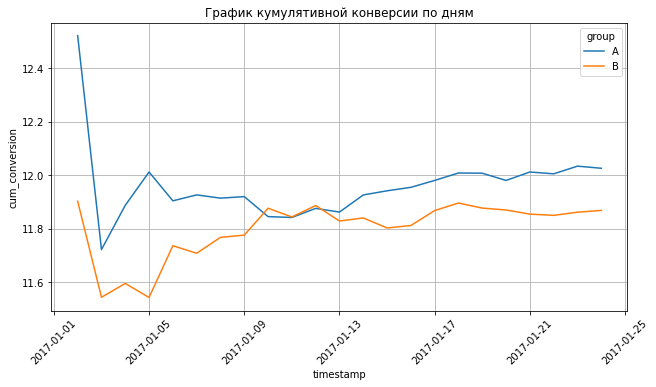

In [13]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)

In [14]:
sample_a = pd.read_csv('Data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('Data/ab_test-redesign_sample_b.csv')
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [15]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')
daily_data_a = sample_a.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid':'user_count', 'transactions':'transactions_sum', 'revenue':'revenue_sum'})
daily_data_b = sample_b.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid':'user_count', 'transactions':'transactions_sum', 'revenue':'revenue_sum'})
daily_data_a.head()

,date,group,user_count,transactions_sum,revenue_sum
0,2020-11-06,A,2576,16,1577279
1,2020-11-07,A,2704,23,1721886
2,2020-11-08,A,3354,25,846051
3,2020-11-09,A,3234,18,708830
4,2020-11-10,A,3022,29,826984


In [16]:
daily_data_a[daily_data_a['date']=='2020-11-08']

,date,group,user_count,transactions_sum,revenue_sum
2,2020-11-08,A,3354,25,846051


In [17]:
daily_data_a.loc[:,'cum_users_count'] = daily_data_a['user_count'].cumsum()
daily_data_a.loc[:,'cum_transactions_sum'] = daily_data_a['transactions_sum'].cumsum()
daily_data_a.loc[:,'cum_revenue_sum'] = daily_data_a['revenue_sum'].cumsum()
daily_data_b.loc[:,'cum_users_count'] = daily_data_b['user_count'].cumsum()
daily_data_b.loc[:,'cum_transactions_sum'] = daily_data_b['transactions_sum'].cumsum()
daily_data_b.loc[:,'cum_revenue_sum'] = daily_data_b['revenue_sum'].cumsum()

daily_data_a['cum_conversion'] = round(daily_data_a['cum_transactions_sum']/daily_data_a['cum_users_count']*100,2)
daily_data_a['cum_check'] = round(daily_data_a['cum_revenue_sum']/daily_data_a['cum_transactions_sum'],2)
daily_data_b['cum_conversion'] = round(daily_data_b['cum_transactions_sum']/daily_data_b['cum_users_count']*100,2)
daily_data_b['cum_check'] = round(daily_data_b['cum_revenue_sum']/daily_data_b['cum_transactions_sum'],2)

In [18]:
print(daily_data_a['cum_conversion'].mean(), daily_data_b['cum_conversion'].mean())

0.7122222222222221 0.7616666666666666


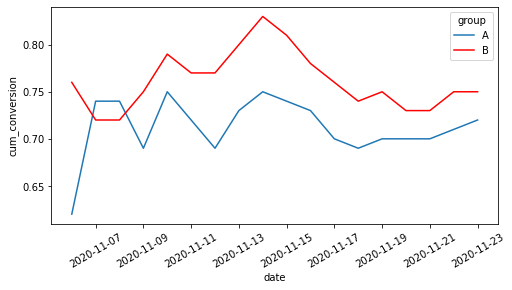

In [19]:
plt.figure(figsize=(8,4))
g = sns.lineplot(data=daily_data_a,x='date',y='cum_conversion',hue='group')
g.tick_params(axis='x',rotation=30)
g_2 = sns.lineplot(data=daily_data_b,x='date',y='cum_conversion',hue='group',palette=['r'])
g_2.tick_params(axis='x',rotation=30)

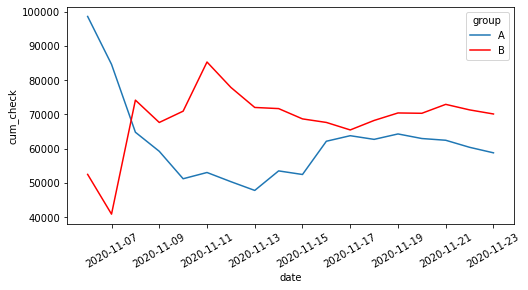

In [20]:
plt.figure(figsize=(8,4))
g = sns.lineplot(data=daily_data_a,x='date',y='cum_check',hue='group')
g.tick_params(axis='x',rotation=30)
g_2 = sns.lineplot(data=daily_data_b,x='date',y='cum_check',hue='group',palette=['r'])
g_2.tick_params(axis='x',rotation=30)

In [21]:
from statsmodels.stats.proportion import proportions_ztest

In [22]:
ab_data = pd.read_csv('Data/ab_data.csv')
converted_piv = ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


In [23]:
alpha = 0.1
H0='Конверсии в группах A и B равны'
H1='Конверсия в группе A выше, чем конверсия в В'
_, p_value = proportions_ztest(
    count=converted_piv['sum'], # число успехов
    nobs=converted_piv['count'], #общее число наблюдей
    alternative='larger',
)
print('p-value: ', round(p_value,2))
if (p_value < alpha):
    print('Отвергаем нулевую гипотезую. {}'.format(H0))
    print('Альтернативная гипотеза. H1: {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))

p-value:  0.1
Отвергаем нулевую гипотезую. Конверсии в группах A и B равны
Альтернативная гипотеза. H1: Конверсия в группе A выше, чем конверсия в В


In [24]:
proportions_ztest(
    count=converted_piv['sum'], # число успехов
    nobs=converted_piv['count'], #общее число наблюдей
    alternative='larger',
)

(1.3099910435866409, 0.09509943275243543)

In [25]:
converted_piv

,sum,count
group,,
A,17467,145241
B,17238,145241


Разницы между вариантами рекомендаций сопуствующих товаров нет - они одинаково эффективны по метрике конверсии

In [26]:
time_data = pd.read_excel('Data/time_data.xlsx')

In [27]:
time_data.head()

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


Text(0.5, 1.0, 'Распределение времени на сайте в группе В')

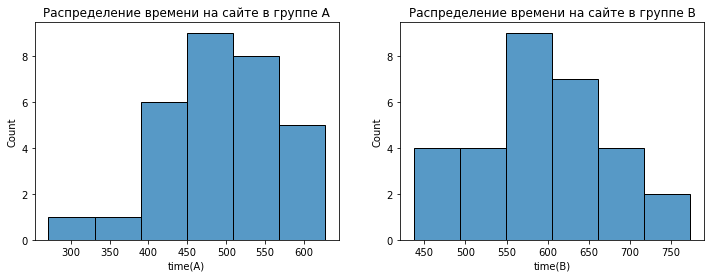

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
axes[0].set_title('Распределение времени на сайте в группе A')
axes[1].set_title('Распределение времени на сайте в группе В')

In [29]:
from scipy.stats import shapiro
H0 = 'Распределение в обеих группах нормальное'
H1 = 'Распределение в одной или более группах отлично от нормального'

shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А: ', round(shapiro_result_a.pvalue,2))
print('p-value группы B: ', round(shapiro_result_b.pvalue,2))
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H0))
    print('Принимаем альтернативную гипотезу. {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу. {}'.format(H0))


p-value группы А:  0.43
p-value группы B:  0.12
Принимаем нулевую гипотезу. Распределение в обеих группах нормальное


Распределение в группах нормальное, означает, что мы можем воспользоваться t test для того, чтоб сравнить среднее время посещения сайта в группах

In [30]:
from scipy.stats import ttest_ind
H0 = 'Cреднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05
results =  ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'],
    alternative='less'
)
print('p-value:', round(results.pvalue,2))
if results.pvalue < alpha:
    print('Отказываемся от нулевой гипотезы')
else:
    print('Принимаем нулевую гипотезу')

p-value: 0.0
Отказываемся от нулевой гипотезы


In [31]:
print(sample_a, sample_b)

            date           cid  transactions  revenue group
0     2020-11-06  1.001648e+09             0        0     A
1     2020-11-06  1.001936e+09             0        0     A
2     2020-11-06  1.003214e+08             0        0     A
3     2020-11-06  1.004393e+09             0        0     A
4     2020-11-06  1.006382e+09             0        0     A
...          ...           ...           ...      ...   ...
61566 2020-11-23  9.986289e+08             0        0     A
61567 2020-11-23  9.989196e+08             0        0     A
61568 2020-11-23  9.990631e+08             0        0     A
61569 2020-11-23  9.994210e+07             0        0     A
61570 2020-11-23  9.994748e+08             0        0     A

[61571 rows x 5 columns]             date           cid  transactions  revenue group
0     2020-11-06  1.000135e+09             0        0     B
1     2020-11-06  1.001648e+09             0        0     B
2     2020-11-06  1.003214e+08             0        0     B
3     2020-11-

In [32]:
sample_result = pd.concat([sample_a,sample_b], ignore_index=True)
converted_piv = sample_result.groupby('group')['transactions'].agg(
    ['sum', 'count']
)
converted_piv

,sum,count
group,,
A,441,61571
B,463,61383


In [33]:
H0 = 'Конверсия в обеих группах не различается'
from statsmodels.stats.proportion import proportions_ztest
_, p_value = proportions_ztest(
    count=converted_piv['sum'], # число успехов
    nobs=converted_piv['count'], #общее число наблюдей
    alternative='larger',
)
if p_value < alpha:
    print('Отказываемся от нулевой гипотезы')
else:
    print('Принимаем нулевую гипотезу {}'.format(H0))

Принимаем нулевую гипотезу Конверсия в обеих группах не различается


In [34]:
from scipy.stats import shapiro
df = sample_result.groupby(['group','date'])[['revenue','transactions']].agg({'transactions':'sum', 'revenue':'sum'}).reset_index()
df

,group,date,transactions,revenue
0,A,2020-11-06,16,1577279
1,A,2020-11-07,23,1721886
2,A,2020-11-08,25,846051
3,A,2020-11-09,18,708830
4,A,2020-11-10,29,826984
5,A,2020-11-11,19,1209656
6,A,2020-11-12,19,607839
7,A,2020-11-13,36,1338816
8,A,2020-11-14,30,2659277
9,A,2020-11-15,27,1189970


In [35]:
df['mean_revenue'] = round(df['revenue']/df['transactions'])

In [36]:
shapiro_result_a = shapiro(df[df['group']=='A'][['mean_revenue']])
shapiro_result_b = shapiro(df[df['group']=='B'][['mean_revenue']])
H0 = 'Распределения в обеих группах являются нормальными'
H1 = 'Расределения в обеих группах отличны от нормального'
alpha = 0.05
if shapiro_result_b.pvalue < alpha or shapiro_result_a.pvalue < alpha:
    print('Отказываемся от нулевой гипотезы')
else:
    print('Принимаем нулевую гипотезу')

Отказываемся от нулевой гипотезы


In [37]:
from scipy.stats import mannwhitneyu
alpha = 0.1

In [38]:
_, p_value = mannwhitneyu(df[df['group']=='A'][['mean_revenue']],df[df['group']=='B'][['mean_revenue']], alternative='less')#используем x<y
p_value[0]

0.08937067987846736

Доверительные интервалы

Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки и ответить на вопросы заданий ниже.

In [39]:
n = 64
x_mean = 12.35
sigma = 2.4
gamma = 0.90
alpha = 1 - gamma


In [40]:
from scipy.stats import norm
def interval(n,x_mean, sigma, gamma, alpha):
    z_crit = round(-norm.ppf(alpha/2),2)
    eps = z_crit * sigma/(n**0.5)
    lower_bound = x_mean - eps
    upper_bound = x_mean + eps
    confidence_interval = (round(lower_bound,2), round(upper_bound,2))
    print('Доверительный интервал: {}'.format(confidence_interval))
interval(n, x_mean, sigma, gamma, alpha)

Доверительный интервал: (11.86, 12.84)


In [41]:
z_crit = -norm.ppf(alpha/2)
z_crit

1.6448536269514729

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей.

In [42]:
n = 15 #размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надежности
alpha = 1 - gamma # уровень значимости

Найти значение t-критического для любого уровня значимости можно, используя функцию t.ppf() из модуля scipy.stats. Для этого в функцию передаётся интересующий уровень значимости (alpha/2) и число степеней свободы (k=n-1). Аналогично z-критическому функция возвращает отрицательный модуль t-критического, поэтому мы берём его со знаком минус:

In [43]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k)# t критическое

In [44]:
eps = t_crit * x_std / (n**0.5) # погрешность
lower_bound = x_mean - eps # нижняя граница
upper_bound = x_mean + eps # верхняя граница
confidence_interval = (round(lower_bound), round(upper_bound))# создаем кортеж из округленных границ интервала
print('Доверительный интервал: {}'.format(confidence_interval))

Доверительный интервал: (1778, 2222)


In [79]:
n = 25
k = n - 1
x_mean = 3540
x_std = 1150
gamma = 0.9
alpha = 1 - gamma

In [80]:
from scipy.stats import t
def interval_x_std(n,x_mean,x_std,gamma=0.9):
    alpha = 1 - gamma
    t_crit = -t.ppf(alpha/2,k)
    eps = t_crit * x_std / (n**0.5) # погрешность
    lower_bound = x_mean - eps #нижняя граница
    upper_bound = x_mean + eps #верхняя граница
    return round(lower_bound,2),round(upper_bound,2)
print('Доверительный интервал: {}'.format(interval_x_std(n,x_mean,x_std)))

Доверительный интервал: (3146.5, 3933.5)


# Доверительный интервал для пропорции

In [54]:
ad_data = pd.read_csv('Data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [55]:
a_data = ab_data[ab_data['group']=='A']
b_data = ab_data[ab_data['group']=='B']

In [56]:
def proportions_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma
    z_crit = -norm.ppf(alpha/2)# z критическое
    eps = z_crit * (x_p *(1 - x_p)/n)**0.5# погрешность
    lower_bound = x_p - eps # нижняя граница
    upper_bound = x_p + eps # верхняя граница
    return round(lower_bound*100,2), round(upper_bound*100,2)

In [57]:
conf_interval_a = proportions_conf_interval(
    n=a_data['user_id'].count(), # размер выборки
    x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
    n=b_data['user_id'].count(), # размер выборки
    x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии в группе А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии в группе B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии в группе А: (11.86, 12.19)
Доверительный интервал для конверсии в группе B: (11.7, 12.03)


In [68]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [69]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


То есть разница в конверсии с 95% надежностью может быть как положительной, так и отрицательной. Мы имеем дело с третьим случаем - интервал охватывает точку 0.
Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами A и B не существует, то есть они являются равнозначными по данной метрике.

Обычно доверительные интервалы используются в комплексе со статистическими тестами. Статистический тест показывает, значимы ли наши результаты, а доверительный интервал показывает пределы изменения метрик и их разницы в группах.

In [71]:
n = 189
positive_comments = 132
negative_comments = n - positive_comments

In [73]:
round(positive_comments/n,3)

0.698

In [76]:
n = 189
n_positive = 132
x_p = n_positive/n
print('Доверительный интервал: {}'.format(proportions_conf_interval(n, x_p, gamma=0.9))) # положительные отрицательные комментарии / распределение бернулли пользуемся функцией для пропорций

Доверительный интервал: (64.35, 75.33)


In [77]:
n = [1000, 1000]
xp = [45/1000, 50/1000]
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-1.36, 2.36)


In [82]:
#diff_proportions_conf_interval() # доверительный интервал разницы пропорций
#proportions_conf_interval() # доверительный интервал для пропорции
#interval() # доверительный интервал для среднего при известном истинном стандартном направлении
#interval_x_std() # доверительный интервал для среднего при неизвестном стандартном отклонении

Итак, A/B-тестирование проводится для того, чтобы сравнить два (или более) варианта продукта по их эффективности (значениям метрик).
Процесс заключается в разделении аудитории на группы и предоставлении каждой группе своего варианта продукта. На протяжении тестирования собираются данные о метриках, и на основании результатов делается вывод, какой из вариантов лучше.
A/B-тесты — очень важный инструмент, особенно если ваш продукт основан на взаимодействии с пользователями. Если вы хотите протестировать новую идею, но не знаете, как оценить результат, то A/B-тестирование станет для вас верным другом. Оно позволяет узнать предпочтения ваших пользователей и понять, какие изменения в продукт стоит вводить.
Процесс проведения тестирования условно разделяется на следующие этапы, представленные на диаграмме:

# Задача

In [83]:
ab_data = pd.read_csv('Data/ab_data_tourist.csv')
ab_data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
